<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:

# Create a Ticker object for Tesla (TSLA)
ticker = yf.Ticker("TSLA")

# Print basic information about the stock
print("Stock Info for TSLA:")
print(ticker.info)

Stock Info for TSLA:
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [9]:
# Create a Ticker object for Tesla (TSLA)
ticker = yf.Ticker("TSLA")

# Extract historical stock information for the maximum period
tesla_data = ticker.history(period="max")

# Display the first few rows of the DataFrame
print("Tesla Stock Data:")
print(tesla_data.head())

Tesla Stock Data:
                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
ticker = yf.Ticker("TSLA")

# Extract historical stock information for the maximum period
tesla_data = ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print("Tesla Stock Data:")
print(tesla_data.head())

Tesla Stock Data:
        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as a variable named html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [14]:
# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [17]:

# Find the table with Tesla Revenue
tables = soup.find_all('table')

# Identify the correct table (you might need to inspect the HTML to find the right one)
target_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        target_table = table
        break

# Extract data and create a dataframe
data = []
if target_table:
    table_rows = target_table.find_all('tr')
    for row in table_rows:
        cols = row.find_all(['th', 'td'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(data[1:], columns=['Date', 'Revenue'])

    # Display the DataFrame
    print(tesla_revenue)
else:
    print("Table not found.")

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
# Assuming you have the tesla_revenue DataFrame already
last_5_rows = tesla_revenue.tail(5)

# Display the last 5 rows
print(last_5_rows)

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [19]:
gme_ticker = yf.Ticker("GME")

# Extract historical data with the history function
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the data
print(gme_data.head())

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [20]:
# Create a ticker object for GameStop with the symbol 'GME'
gme_ticker = yf.Ticker("GME")

# Extract historical data with the history function and set period to max
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the data
print(gme_data.head())

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [21]:
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response into html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Error: Unable to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [23]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [24]:
gme_table = soup.find_all('table')[1]

# Convert the HTML table to a DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]

# Display the first few rows of the DataFrame
print(gme_revenue.head())

gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the updated DataFrame
print(gme_revenue.head())

  GameStop Quarterly Revenue(Millions of US $)  \
0                                   2020-04-30   
1                                   2020-01-31   
2                                   2019-10-31   
3                                   2019-07-31   
4                                   2019-04-30   

  GameStop Quarterly Revenue(Millions of US $).1  
0                                         $1,021  
1                                         $2,194  
2                                         $1,439  
3                                         $1,286  
4                                         $1,548  


KeyError: 'Revenue'

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
print(gme_revenue.tail())

   GameStop Quarterly Revenue(Millions of US $)  \
57                                   2006-01-31   
58                                   2005-10-31   
59                                   2005-07-31   
60                                   2005-04-30   
61                                   2005-01-31   

   GameStop Quarterly Revenue(Millions of US $).1  
57                                         $1,667  
58                                           $534  
59                                           $416  
60                                           $475  
61                                           $709  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


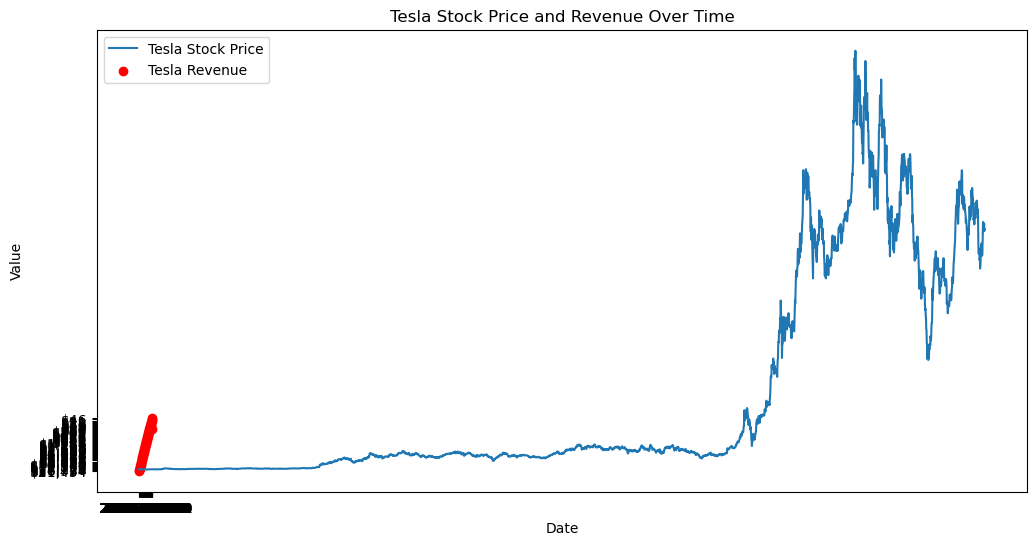

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming tesla_data is the DataFrame containing Tesla stock data
# Assuming tesla_revenue is the DataFrame containing Tesla revenue data

# Plotting the stock data
plt.figure(figsize=(12, 6))
sns.lineplot(x=tesla_data.index, y='Close', data=tesla_data, label='Tesla Stock Price')

# Plotting the revenue data
plt.scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], color='red', label='Tesla Revenue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Tesla Stock Price and Revenue Over Time')

# Displaying legend
plt.legend()

# Displaying the plot
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
